In [2]:
# libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn import datasets

# libraries for visualization
from plotnine import *
import matplotlib.pyplot as plt

# helper functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline


# support vector classifier (used for support vector machines and maximal margin classifiers as well)
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


Let's first create a data set that's linearly separable with 2 classes. We will use the make_blobs function.

In [3]:
# cluster_std is how far the data points spread out from the center
X, y = datasets.make_blobs(
    n_samples=50, centers=2, cluster_std=1, random_state=42
)

Let's convert our arrays into a single dataframe for visualization

In [4]:
df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

We will follow the usual modeling process:
- Visualize and explore data
- Initialize model 
- Fit model with training data
- Assess model performance

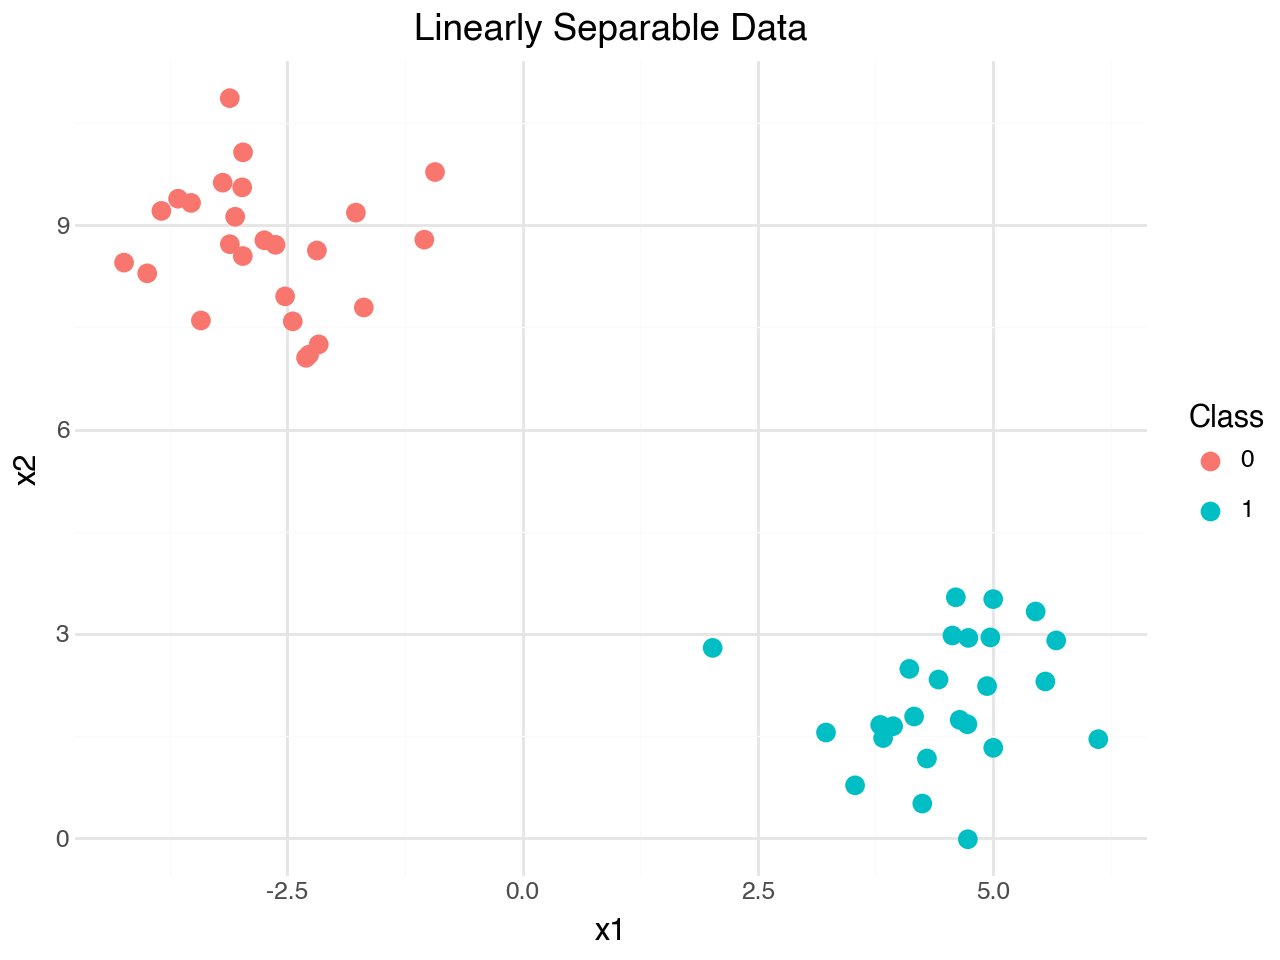

In [5]:
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_minimal() +
    labs(title="Linearly Separable Data", color="Class")
)

Maximal Marginal Classifiers are not available in scikit-learn. We will use SVC (Support Vector Classifier) function call to imitate a Hard-Margin Classifier. 

In [6]:
# initialize hard-margin Maximal Marginal Classifier
# we will do so by making C be a large value. Large C = model is strict and penalizes misclassification severely.
mmc = SVC(kernel="linear",C=1e6)

In [7]:
# fit model

In [8]:
# this function is designed to visualize the hyperplane in 2D

def show_hyperplane(model,X,data):
  # generate grid
  xx, yy = np.meshgrid(
      np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
      np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
  )
  # for each x,y combination, predict the class
  Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # create dataframe for grid
  df_grid = pd.DataFrame(dict(
      x1=xx.ravel(),
      x2=yy.ravel(),
      decision=Z.ravel(),
      class_pred=model.predict(np.c_[xx.ravel(), yy.ravel()])
  ))

  # create plot using grid
  p = (
      ggplot(data, aes("x1", "x2")) +
      geom_tile(df_grid, aes("x1", "x2", fill="factor(class_pred)"), alpha=0.2) +
      geom_point(aes(color="factor(label)"), size=3) +
      geom_point(pd.DataFrame(model.support_vectors_, columns=["x1","x2"]),
                aes("x1", "x2"), shape="o", size=5, fill="none", color="black") +
      theme_538() +
      labs(title="Hyperplane Based Decision Boundary",
          color="True Class", fill="Predicted Class")
  )

  return p



In [ ]:
show_hyperplane(mmc,X,df)

Let's try again but this time with a more complex data set where the classes are not linearly separable

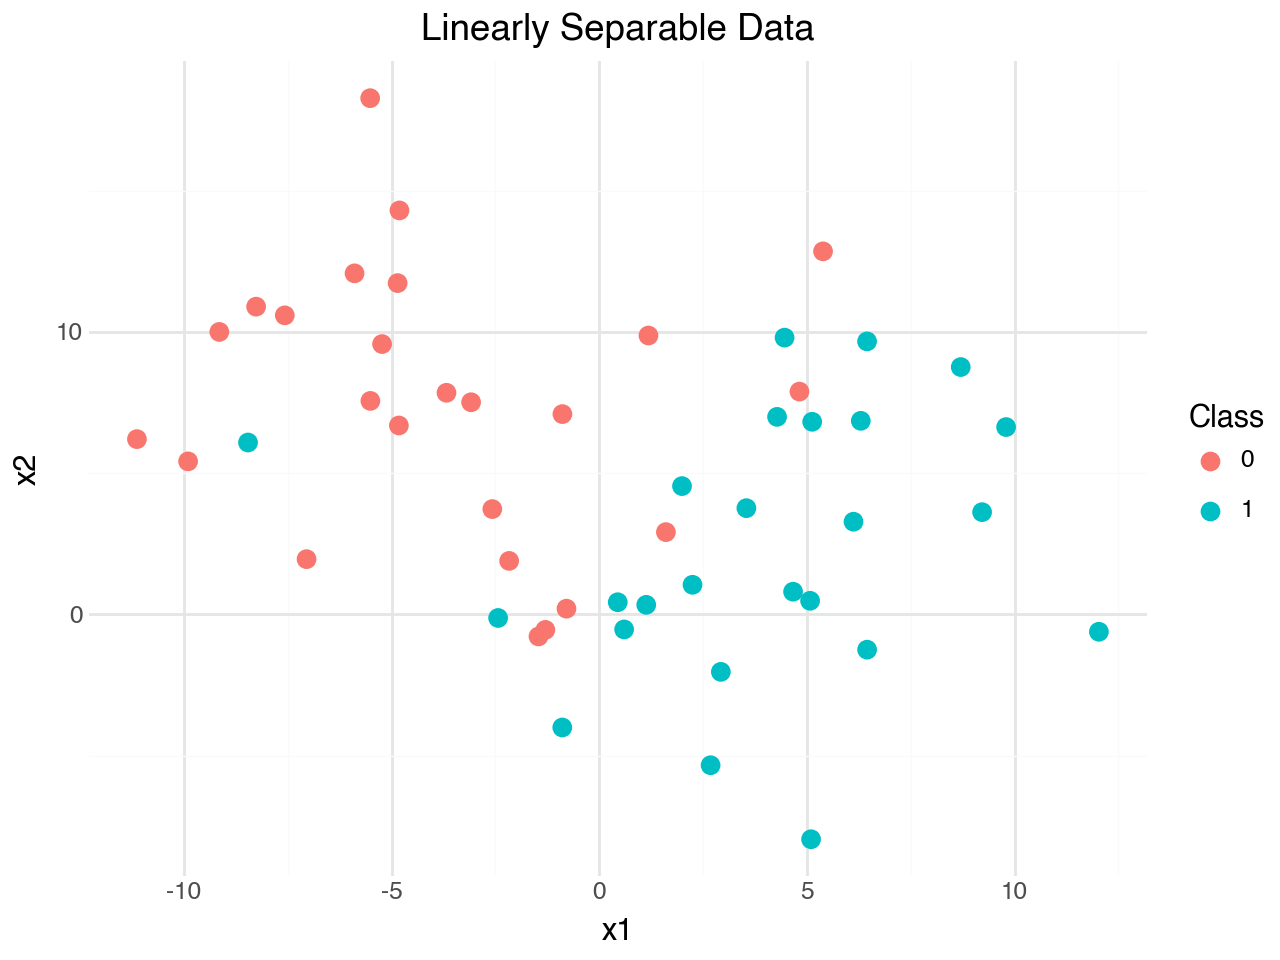

In [9]:
# prepare data
X, y = datasets.make_blobs(
    n_samples=50, centers=2, cluster_std=5, random_state=42
)

df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

# visualize data
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_minimal() +
    labs(title="Linearly Separable Data", color="Class")
)

In [10]:
# initialize model

# fit data to model

# evaluate model

# visualize model

In [11]:
# we can make C to be smaller. This will make the margin to be wider, allowing more slack/violations

# initialize model

# fit data to model

# evaluate model

# visualize model

In [12]:
# let's try a quadratic polynomial SVM

# initialize model

# fit data to model

# evaluate model

# visualize model


Let's now use a dataset where even a polynomial kernel SVM may not be applicable.

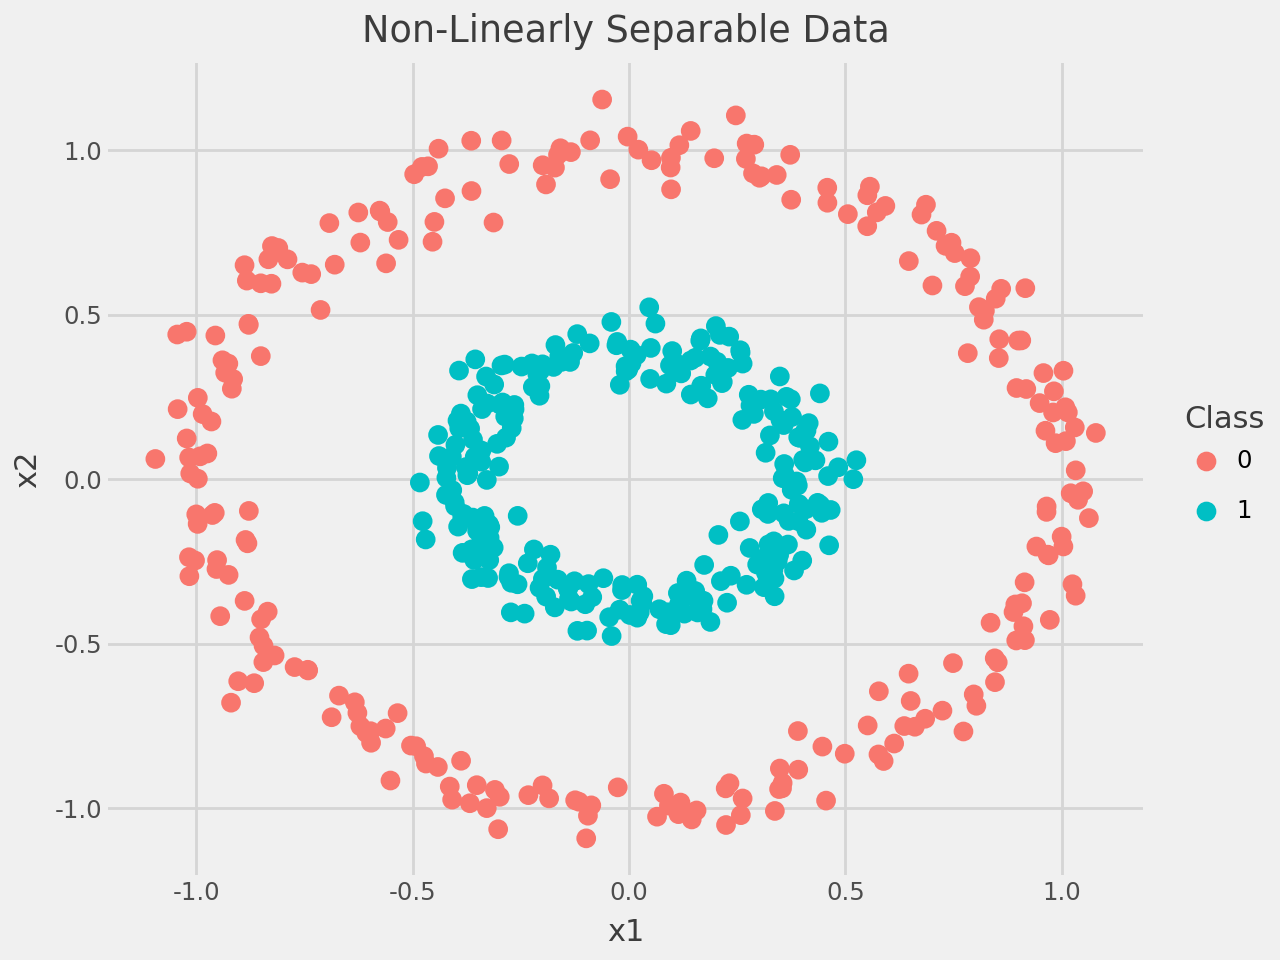

In [13]:
# prepare data
X, y = datasets.make_circles(n_samples=500, factor=0.4, noise=0.05, random_state=42)

df = pd.DataFrame({'x1':X[:,0],'x2':X[:,1],'label':y})

# visualize data
(
    ggplot(df, aes("x1", "x2", color="factor(label)")) +
    geom_point(size=3) +
    theme_538() +
    labs(title="Non-Linearly Separable Data", color="Class")
)

In [14]:
# let's try a polynomial SVM

# initialize model

# fit data to model

# evaluate model

# visualize model


Let's now try a Radial Basis Function (RBF) Kernel function. 

In [15]:
# let's try an RBF SVM

# initialize model

# fit data to model

# evaluate model

# visualize model


Hyperparameters in scikit-learn for Support Vector Machines:
- gamma: scales amount of influence between two observations (larger value of gamma means smaller influence)
- coef0: this is the r variable in the Polynomial Kernel function
- degree: degree of the Polynomial Kernel


In [ ]:
d = pd.read_csv("svm_example_rbf.csv")

We can begin using Pipelines to streamline our model workflow. We can also start using GridSearch Cross Validation to automatically find the best hyperparameters for our models. 

In [19]:
# visualize data

# clean data

# generate pipeline

# generate grid search parameter ranges

# fit model

# evaluate model

# visualize model